<a href="https://colab.research.google.com/github/WaquarH/data-science-work/blob/main/Exp3_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1><b>Experiment-3</b></h1>

<h2><b>Aim:-K-means Clustering using a dataset </b></h2>

<h2><b>K-Means Clustering intuition</b><br></h2>


K-Means clustering is used to find intrinsic groups within the unlabelled dataset and draw inferences from them. It is based on centroid-based clustering.

<b>Centroid -</b> A centroid is a data point at the centre of a cluster. In centroid-based clustering, clusters are represented by a centroid. It is an iterative algorithm in which the notion of similarity is derived by how close a data point is to the centroid of the cluster. K-Means clustering works as follows:- The K-Means clustering algorithm uses an iterative procedure to deliver a final result. The algorithm requires number of clusters K and the data set as input. The data set is a collection of features for each data point. The algorithm starts with initial estimates for the K centroids. The algorithm then iterates between two steps:-

**import libraries**

In [59]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # for data visualization
import seaborn as sns # for statistical data visualization
%matplotlib inline

**Ignore warnings**

In [60]:
import warnings

warnings.filterwarnings('ignore')

**Import dataset**

In [61]:
data = '/content/Live.csv'
df = pd.read_csv(data)


**Exploratory data analysis**

In [62]:
df.shape

(7050, 16)

In [63]:
#Preview the dataset
df.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN


In [64]:
#View summary of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   status_id         7050 non-null   object 
 1   status_type       7050 non-null   object 
 2   status_published  7050 non-null   object 
 3   num_reactions     7050 non-null   int64  
 4   num_comments      7050 non-null   int64  
 5   num_shares        7050 non-null   int64  
 6   num_likes         7050 non-null   int64  
 7   num_loves         7050 non-null   int64  
 8   num_wows          7050 non-null   int64  
 9   num_hahas         7050 non-null   int64  
 10  num_sads          7050 non-null   int64  
 11  num_angrys        7050 non-null   int64  
 12  Column1           0 non-null      float64
 13  Column2           0 non-null      float64
 14  Column3           0 non-null      float64
 15  Column4           0 non-null      float64
dtypes: float64(4), int64(9), object(3)
memory 

In [65]:
#Check for missing values in dataset
df.isnull().sum()

status_id              0
status_type            0
status_published       0
num_reactions          0
num_comments           0
num_shares             0
num_likes              0
num_loves              0
num_wows               0
num_hahas              0
num_sads               0
num_angrys             0
Column1             7050
Column2             7050
Column3             7050
Column4             7050
dtype: int64

We can see that there are 4 redundant columns in the dataset. We should drop them before proceeding further.

In [66]:
#Drop redundant columns
df.drop(['Column1', 'Column2', 'Column3', 'Column4'], axis=1, inplace=True)

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   status_id         7050 non-null   object
 1   status_type       7050 non-null   object
 2   status_published  7050 non-null   object
 3   num_reactions     7050 non-null   int64 
 4   num_comments      7050 non-null   int64 
 5   num_shares        7050 non-null   int64 
 6   num_likes         7050 non-null   int64 
 7   num_loves         7050 non-null   int64 
 8   num_wows          7050 non-null   int64 
 9   num_hahas         7050 non-null   int64 
 10  num_sads          7050 non-null   int64 
 11  num_angrys        7050 non-null   int64 
dtypes: int64(9), object(3)
memory usage: 661.1+ KB


In [68]:
#View the statistical summary of numerical variables
df.describe()

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
count,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000
mean,230.117163,224.356028,40.022553,215.043121,12.728652,1.289362,0.696454,0.243688,0.113191
std,462.625309,889.636820,131.599965,449.472357,39.972930,8.719650,3.957183,1.597156,0.726812
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.000000,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,59.500000,4.000000,0.000000,58.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,219.000000,23.000000,4.000000,184.750000,3.000000,0.000000,0.000000,0.000000,0.000000
max,4710.000000,20990.000000,3424.000000,4710.000000,657.000000,278.000000,157.000000,51.000000,31.000000


There are 3 categorical variables in the dataset. I will explore them one by one

In [69]:
# view the labels in the variable

df['status_id'].unique()

array(['246675545449582_1649696485147474',
       '246675545449582_1649426988507757',
       '246675545449582_1648730588577397', ...,
       '1050855161656896_1060126464063099',
       '1050855161656896_1058663487542730',
       '1050855161656896_1050858841656528'], dtype=object)

In [70]:
# view how many different types of variables are there

len(df['status_id'].unique())

6997

We can see that there are 6997 unique labels in the status_id variable. The total number of instances in the dataset is 7050. So, it is approximately a unique identifier for each of the instances. Thus this is not a variable that we can use. Hence, I will drop it.

In [71]:
# view the labels in the variable

df['status_published'].unique()

array(['4/22/2018 6:00', '4/21/2018 22:45', '4/21/2018 6:17', ...,
       '9/21/2016 23:03', '9/20/2016 0:43', '9/10/2016 10:30'],
      dtype=object)

In [72]:
# view how many different types of variables are there

len(df['status_published'].unique())

6913

Again, we can see that there are 6913 unique labels in the status_published variable. The total number of instances in the dataset is 7050. So, it is also a approximately a unique identifier for each of the instances. Thus this is not a variable that we can use. Hence, I will drop it also.


In [73]:
# view the labels in the variable

df['status_type'].unique()

array(['video', 'photo', 'link', 'status'], dtype=object)

In [74]:
# view how many different types of variables are there

len(df['status_type'].unique())

4

We can see that there are 4 categories of labels in the status_type variable

*Drop status_id and status_published variable from the dataset*

In [75]:
df.drop(['status_id', 'status_published'], axis=1, inplace=True)

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   status_type    7050 non-null   object
 1   num_reactions  7050 non-null   int64 
 2   num_comments   7050 non-null   int64 
 3   num_shares     7050 non-null   int64 
 4   num_likes      7050 non-null   int64 
 5   num_loves      7050 non-null   int64 
 6   num_wows       7050 non-null   int64 
 7   num_hahas      7050 non-null   int64 
 8   num_sads       7050 non-null   int64 
 9   num_angrys     7050 non-null   int64 
dtypes: int64(9), object(1)
memory usage: 550.9+ KB


In [77]:
df.head()

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,video,529,512,262,432,92,3,1,1,0
1,photo,150,0,0,150,0,0,0,0,0
2,video,227,236,57,204,21,1,1,0,0
3,photo,111,0,0,111,0,0,0,0,0
4,photo,213,0,0,204,9,0,0,0,0


**Declare feature vector and target variable**

In [78]:
X = df

y = df['status_type']

**Convert categorical variable into integers**

In [79]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

X['status_type'] = le.fit_transform(X['status_type'])

y = le.transform(y)

**View the summary of X**

In [80]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   status_type    7050 non-null   int64
 1   num_reactions  7050 non-null   int64
 2   num_comments   7050 non-null   int64
 3   num_shares     7050 non-null   int64
 4   num_likes      7050 non-null   int64
 5   num_loves      7050 non-null   int64
 6   num_wows       7050 non-null   int64
 7   num_hahas      7050 non-null   int64
 8   num_sads       7050 non-null   int64
 9   num_angrys     7050 non-null   int64
dtypes: int64(10)
memory usage: 550.9 KB


**Preview the dataset X**

In [81]:
X.head()

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,3,529,512,262,432,92,3,1,1,0
1,1,150,0,0,150,0,0,0,0,0
2,3,227,236,57,204,21,1,1,0,0
3,1,111,0,0,111,0,0,0,0,0
4,1,213,0,0,204,9,0,0,0,0


**Feature Scaling**

In [82]:
cols = X.columns

In [83]:
from sklearn.preprocessing import MinMaxScaler

ms = MinMaxScaler()

X = ms.fit_transform(X)

In [84]:
X = pd.DataFrame(X, columns=[cols])

In [85]:
X.head()

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,1.000000,0.112314,0.024393,0.076519,0.091720,0.140030,0.010791,0.006369,0.019608,0.0
1,0.333333,0.031847,0.000000,0.000000,0.031847,0.000000,0.000000,0.000000,0.000000,0.0
2,1.000000,0.048195,0.011243,0.016647,0.043312,0.031963,0.003597,0.006369,0.000000,0.0
3,0.333333,0.023567,0.000000,0.000000,0.023567,0.000000,0.000000,0.000000,0.000000,0.0
4,0.333333,0.045223,0.000000,0.000000,0.043312,0.013699,0.000000,0.000000,0.000000,0.0


**K-Means model with two clusters**

In [86]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=0) 

kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

**K-Means model parameters study**

In [87]:
kmeans.cluster_centers_

array([[3.28506857e-01, 3.90710874e-02, 7.54854864e-04, 7.53667113e-04,
        3.85438884e-02, 2.17448568e-03, 2.43721364e-03, 1.20039760e-03,
        2.75348016e-03, 1.45313276e-03],
       [9.54921576e-01, 6.46330441e-02, 2.67028654e-02, 2.93171709e-02,
        5.71231462e-02, 4.71007076e-02, 8.18581889e-03, 9.65207685e-03,
        8.04219428e-03, 7.19501847e-03]])

In [88]:
#The KMeans algorithm clusters data by trying to separate samples in n groups of equal variances, minimizing a criterion known as inertia
#The lesser the model inertia, the better the model fit.
kmeans.inertia_

237.75726404419564

**Check quality of weak classification by the model**

In [89]:
labels = kmeans.labels_

In [90]:
# check how many of the samples were correctly labeled
correct_labels = sum(y == labels)

In [91]:
print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))

Result: 63 out of 7050 samples were correctly labeled.


In [92]:
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

Accuracy score: 0.01


**Use elbow method to find optimal number of clusters**

---



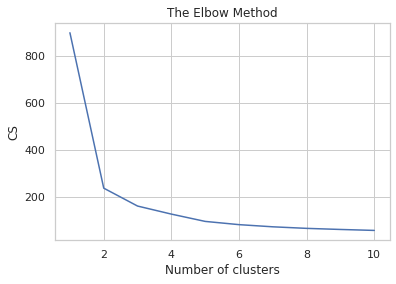

In [93]:
from sklearn.cluster import KMeans
cs = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 11), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

By the above plot, we can see that there is a kink at k=2.

Hence k=2 can be considered a good number of the cluster to cluster this data.

In [94]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2,random_state=0)

kmeans.fit(X)

labels = kmeans.labels_

# check how many of the samples were correctly labeled

correct_labels = sum(y == labels)

print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))

print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

Result: 63 out of 7050 samples were correctly labeled.
Accuracy score: 0.01


**K-Means model with different clusters**

In [95]:
#K-Means model with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=0)

kmeans.fit(X)

# check how many of the samples were correctly labeled
labels = kmeans.labels_

correct_labels = sum(y == labels)
print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

Result: 6 out of 7050 samples were correctly labeled.
Accuracy score: 0.00


In [96]:
#K-Means model with 4 clusters
kmeans = KMeans(n_clusters=4, random_state=0)

kmeans.fit(X)

# check how many of the samples were correctly labeled
labels = kmeans.labels_

correct_labels = sum(y == labels)
print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

Result: 211 out of 7050 samples were correctly labeled.
Accuracy score: 0.03


In [97]:
#K-Means model with 5 clusters
kmeans = KMeans(n_clusters=5, random_state=0)

kmeans.fit(X)

# check how many of the samples were correctly labeled
labels = kmeans.labels_

correct_labels = sum(y == labels)
print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

Result: 82 out of 7050 samples were correctly labeled.
Accuracy score: 0.01


In [98]:
#K-Means model with 6 clusters
kmeans = KMeans(n_clusters=6, random_state=0)

kmeans.fit(X)

# check how many of the samples were correctly labeled
labels = kmeans.labels_

correct_labels = sum(y == labels)
print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

Result: 49 out of 7050 samples were correctly labeled.
Accuracy score: 0.01


In [99]:
#K-Means model with 10 clusters
kmeans = KMeans(n_clusters=10, random_state=0)

kmeans.fit(X)

# check how many of the samples were correctly labeled
labels = kmeans.labels_

correct_labels = sum(y == labels)
print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

Result: 50 out of 7050 samples were correctly labeled.
Accuracy score: 0.01


From all the above , we observe that k=4 is giving us a better accuracy than else.

**Results and conclusion**

In this project, I have implemented the most popular unsupervised clustering technique called K-Means Clustering.

I have applied the elbow method and find that k=2 (k is number of clusters) can be considered a good number of cluster to cluster this data.

I have find that the model has very high inertia of 237.7572. So, this is not a good model fit to the data.

I have achieved a weak classification accuracy of 1% with k=2 by our unsupervised model.

So, I have changed the value of k and find relatively higher classification accuracy of 32% with k=4.

Hence, we can conclude that k=4 being the optimal number of clusters

<h1>Experiment - 4</h1>

<h2><b>Aim:- Linear Regression using dataset </b></h2>

**Dataset Used:- Housing.csv**

In [100]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [101]:
housing = pd.read_csv('/content/housing.csv')

In [102]:
#checking shape of dataset
housing.shape

(20640, 10)

In [103]:
#visualisinf first records of dataset
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


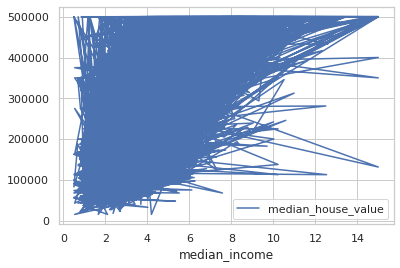

In [104]:
#visualising through graphs
housing.plot("median_income", "median_house_value")

As can be seen, the graph is difficult to understand. There are various lines making it difficult to see individual trends. So, to remedy this, we should use a scatter plot without individual lines.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


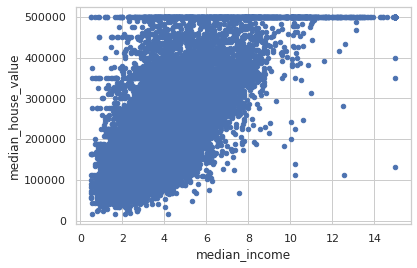

In [105]:
housing.plot.scatter("median_income", "median_house_value")

As can be seen, the correlation is significantly more apparent because there are no longer random lines to distract.

In [106]:
x_train, x_test, y_train, y_test = train_test_split(housing.median_income, housing.median_house_value, test_size = 0.2)

This line of code is very important. The primary function is to split up the data as “train” and “test.”
The overall data will be split up into 80% as train and 20% as test. The “y-values” will be the “median_house_value,” and the “x-values” will be the “median_income.

In [107]:
regr = LinearRegression()

This will call LinearRegression(), and then allow us to use our own data to predict.

In [108]:
regr.fit(np.array(x_train).reshape(-1,1), y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

This will shape the model using one predictor. Reshape is being applied to change it from pandas to NumPy, and finally into a vector. (Reshape transverses it from a single dimension matrix to a vertical shape.)

Then, we need to pass in the data to give predictions.

In [109]:
preds = regr.predict(np.array(x_test).reshape(-1,1))

In [110]:
y_test.head()

2506      58100.0
1943     207600.0
4563     131300.0
12593    101600.0
6846     192300.0
Name: median_house_value, dtype: float64

In [111]:
preds

array([136326.49843606, 220074.19581074, 123258.12144083, ...,
       175715.10376375, 214820.15783563, 204245.36394287])

In [112]:
residuals = preds - y_test

(array([1.000e+01, 6.700e+01, 1.600e+02, 4.170e+02, 1.344e+03, 1.949e+03,
        1.770e+02, 3.000e+00, 0.000e+00, 1.000e+00]),
 array([-425113.38690145, -337010.35685526, -248907.32680906,
        -160804.29676286,  -72701.26671667,   15401.76332953,
         103504.79337573,  191607.82342192,  279710.85346812,
         367813.88351432,  455916.91356052]),
 <a list of 10 Patch objects>)

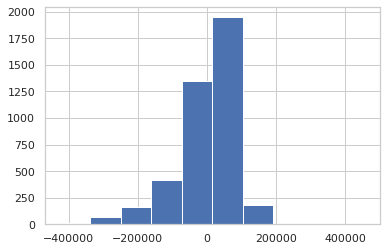

In [113]:
plt.hist(residuals)

This graph above shows the distribution of error. Most of the time, it appears that the values are close-ish to 0. Yet, sometimes the values are very, very wrong.

In [114]:
mean_squared_error(y_test, preds) ** 0.5

84927.36769076962

(Even though it says mean squared error, we used root mean squared error as it was to the 0.5 power!)
The overall mean squared error should be 83041.9009282198, or ~83041.9.

<b>conclusion</b>

Overall, our estimation was as good as we could get it with linear regression. There were many issues; however, that should be considered. First, the data was extremely random, and the correlation was very poor.
Furthermore, we only used linear regression. For a better prediction, we could have used decision trees or random forests.

<h1>Experiment - 5 </h1>

<h2></b>Aim:- Logistic Regression using Dataset</b></h2>

**Dataset Used- Bank.csv**

Logistic Regression is a Machine Learning classification algorithm that is used to predict the probability of a categorical dependent variable. In logistic regression, the dependent variable is a binary variable that contains data coded as 1 (yes, success, etc.) or 0 (no, failure, etc.). In other words, the logistic regression model predicts P(Y=1) as a function of X.

In [115]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [123]:
data=pd.read_csv('/content/bank.csv',header=0)

In [124]:
#dropping null values
data.dropna()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,210,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,138,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,339,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,185,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,137,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,59,retired,married,high.school,unknown,no,yes,telephone,jun,thu,222,1,999,0,nonexistent,1.4,94.465,-41.8,4.866,5228.1,0
41184,31,housemaid,married,basic.4y,unknown,no,no,telephone,may,thu,196,2,999,0,nonexistent,1.1,93.994,-36.4,4.860,5191.0,0
41185,42,admin.,single,university.degree,unknown,yes,yes,telephone,may,wed,62,3,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
41186,48,technician,married,professional.course,no,no,yes,telephone,oct,tue,200,2,999,0,nonexistent,-3.4,92.431,-26.9,0.742,5017.5,0


In [125]:
data.shape

(41188, 21)

In [126]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx',
       'cons_conf_idx', 'euribor3m', 'nr_employed', 'y'],
      dtype='object')

In [127]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,210,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,138,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,339,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,185,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,137,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


In [128]:
data['education'].unique()

array(['basic.4y', 'unknown', 'university.degree', 'high.school',
       'basic.9y', 'professional.course', 'basic.6y', 'illiterate'],
      dtype=object)

In [129]:
#group “basic.4y”, “basic.9y” and “basic.6y” together and call them “basic”.
data['education']=np.where(data['education'] =='basic.9y', 'Basic', data['education'])
data['education']=np.where(data['education'] =='basic.6y', 'Basic', data['education'])
data['education']=np.where(data['education'] =='basic.4y', 'Basic', data['education'])

In [130]:
data['education'].unique()

array(['Basic', 'unknown', 'university.degree', 'high.school',
       'professional.course', 'illiterate'], dtype=object)

**Data exploration**

In [131]:
data['y'].value_counts()

0    36548
1     4640
Name: y, dtype: int64

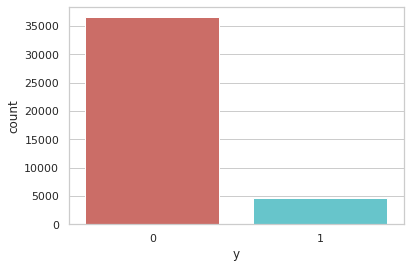

<Figure size 432x288 with 0 Axes>

In [132]:
sns.countplot(x='y',data=data,palette='hls')
plt.show()
plt.savefig('count_plot')

In [133]:
count_no_sub = len(data[data['y']==0])
count_sub = len(data[data['y']==1])
pct_of_no_sub = count_no_sub/(count_no_sub+count_sub)
print("percentage of no subscription is", pct_of_no_sub*100)
pct_of_sub = count_sub/(count_no_sub+count_sub)
print("percentage of subscription", pct_of_sub*100)

percentage of no subscription is 88.73458288821988
percentage of subscription 11.265417111780131


Our classes are imbalanced, and the ratio of no-subscription to subscription instances is 89:11.

In [135]:
data.groupby('job').mean()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
job,,,,,,,,,,,
admin.,38.187296,254.312128,2.623489,954.319229,0.189023,0.015563,93.534054,-40.245433,3.550274,5164.125350,0.129726
blue-collar,39.555760,264.542360,2.558461,985.160363,0.122542,0.248995,93.656656,-41.375816,3.771996,5175.615150,0.068943
entrepreneur,41.723214,263.267857,2.535714,981.267170,0.138736,0.158723,93.605372,-41.283654,3.791120,5176.313530,0.085165
housemaid,45.500000,250.454717,2.639623,960.579245,0.137736,0.433396,93.676576,-39.495283,4.009645,5179.529623,0.100000
management,42.362859,257.058140,2.476060,962.647059,0.185021,-0.012688,93.522755,-40.489466,3.611316,5166.650513,0.112175
retired,62.027326,273.712209,2.476744,897.936047,0.327326,-0.698314,93.430786,-38.573081,2.770066,5122.262151,0.252326
self-employed,39.949331,264.142153,2.660802,976.621393,0.143561,0.094159,93.559982,-40.488107,3.689376,5170.674384,0.104856
services,37.926430,258.398085,2.587805,979.974049,0.154951,0.175359,93.634659,-41.290048,3.699187,5171.600126,0.081381
student,25.894857,283.683429,2.104000,840.217143,0.524571,-1.408000,93.331613,-40.187543,1.884224,5085.939086,0.314286


In [136]:
data.groupby('marital').mean()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
marital,,,,,,,,,,,
divorced,44.899393,253.790330,2.61340,968.639853,0.168690,0.163985,93.606563,-40.707069,3.715603,5170.878643,0.103209
married,42.307165,257.438623,2.57281,967.247673,0.155608,0.183625,93.597367,-40.270659,3.745832,5171.848772,0.101573
single,33.158714,261.524378,2.53380,949.909578,0.211359,-0.167989,93.517300,-40.918698,3.317447,5155.199265,0.140041
unknown,40.275000,312.725000,3.18750,937.100000,0.275000,-0.221250,93.471250,-40.820000,3.313038,5157.393750,0.150000


In [137]:
data.groupby('education').mean()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
education,,,,,,,,,,,
Basic,42.163910,263.043874,2.559498,974.877967,0.141053,0.191329,93.639933,-40.927595,3.729654,5172.014113,0.087029
high.school,37.998213,260.886810,2.568576,964.358382,0.185917,0.032937,93.584857,-40.940641,3.556157,5164.994735,0.108355
illiterate,48.500000,276.777778,2.277778,943.833333,0.111111,-0.133333,93.317333,-39.950000,3.516556,5171.777778,0.222222
professional.course,40.080107,252.533855,2.586115,960.765974,0.163075,0.173012,93.569864,-40.124108,3.710457,5170.155979,0.113485
university.degree,38.879191,253.223373,2.563527,951.807692,0.192390,-0.028090,93.493466,-39.975805,3.529663,5163.226298,0.137245
unknown,43.481225,262.390526,2.596187,942.830734,0.226459,0.059099,93.658615,-39.877816,3.571098,5159.549509,0.145003


<h2><b>Visualizations</b></h2>

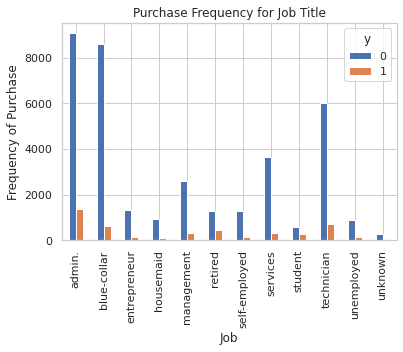

In [138]:
%matplotlib inline
pd.crosstab(data.job,data.y).plot(kind='bar')
plt.title('Purchase Frequency for Job Title')
plt.xlabel('Job')
plt.ylabel('Frequency of Purchase')
plt.savefig('purchase_fre_job')

The frequency of purchase of the deposit depends a great deal on the job title. Thus, the job title can be a good predictor of the outcome variable.

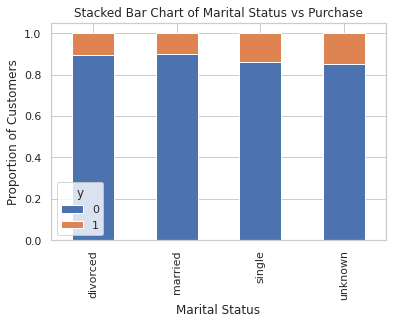

In [139]:
table=pd.crosstab(data.marital,data.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Marital Status vs Purchase')
plt.xlabel('Marital Status')
plt.ylabel('Proportion of Customers')
plt.savefig('mariral_vs_pur_stack')

The marital status does not seem a strong predictor for the outcome variable.

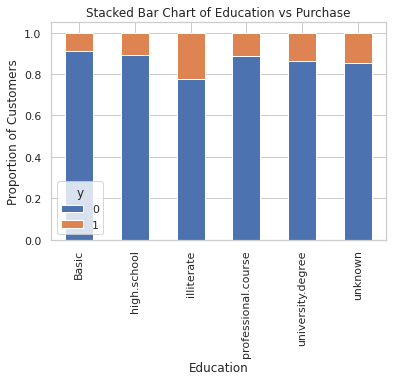

In [140]:
table=pd.crosstab(data.education,data.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Education vs Purchase')
plt.xlabel('Education')
plt.ylabel('Proportion of Customers')
plt.savefig('edu_vs_pur_stack')

Education seems a good predictor of the outcome variable

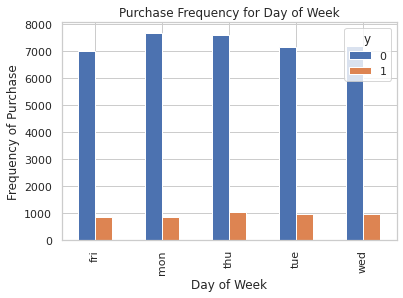

In [141]:
pd.crosstab(data.day_of_week,data.y).plot(kind='bar')
plt.title('Purchase Frequency for Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Frequency of Purchase')
plt.savefig('pur_dayofweek_bar')

Day of week may not be a good predictor of the outcome.

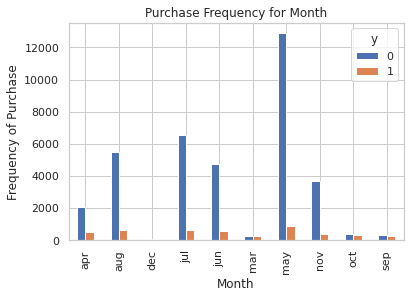

In [142]:
pd.crosstab(data.month,data.y).plot(kind='bar')
plt.title('Purchase Frequency for Month')
plt.xlabel('Month')
plt.ylabel('Frequency of Purchase')
plt.savefig('pur_fre_month_bar')

Month might be a good predictor of the outcome variable.

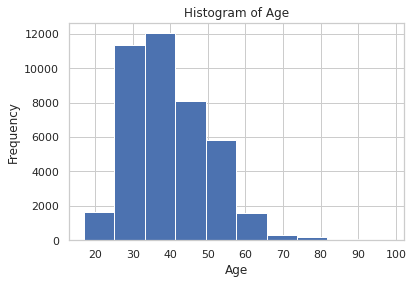

In [143]:
data.age.hist()
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('hist_age')

Most of the customers of the bank in this dataset are in the age range of 30–40.

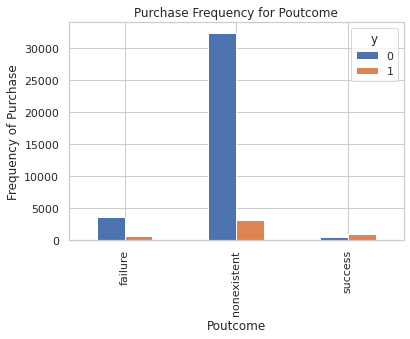

In [144]:
pd.crosstab(data.poutcome,data.y).plot(kind='bar')
plt.title('Purchase Frequency for Poutcome')
plt.xlabel('Poutcome')
plt.ylabel('Frequency of Purchase')
plt.savefig('pur_fre_pout_bar')

Poutcome seems to be a good predictor of the outcome variable.

<h2><b>Create dummy variables <b></h2>

In [145]:
cat_vars=['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(data[var], prefix=var)
    data1=data.join(cat_list)
    data=data1
cat_vars=['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']
data_vars=data.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_vars]

Our final data columns will be:

In [146]:
data_final=data[to_keep]
data_final.columns.values

array(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp_var_rate',
       'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed', 'y',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student',
       'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_Basic', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree', 'education_unknown', 'default_no',
       'default_unknown', 'default_yes', 'housing_no', 'housing_unknown',
       'housing_yes', 'loan_no', 'loan_unknown', 'loan_yes',
       'contact_cellular', 'contact_telephone', 'month_apr', 'month_aug',
       'month_dec', 'month_jul', 'month_jun', 'month_mar', 'month_may',
       'month_nov', 'month_oct', 'month_sep', 'day_of_week_fri',

In [147]:
#Over-sampling using SMOTE(Synthetic Minority Oversampling Technique)
#Works by creating synthetic samples from the minor class (no-subscription) instead of creating copies.
X = data_final.loc[:, data_final.columns != 'y']
y = data_final.loc[:, data_final.columns == 'y']
from imblearn.over_sampling import SMOTE
os = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
columns = X_train.columns
os_data_X,os_data_y=os.fit_sample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['y'])
# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_X))
print("Number of no subscription in oversampled data",len(os_data_y[os_data_y['y']==0]))
print("Number of subscription",len(os_data_y[os_data_y['y']==1]))
print("Proportion of no subscription data in oversampled data is ",len(os_data_y[os_data_y['y']==0])/len(os_data_X))
print("Proportion of subscription data in oversampled data is ",len(os_data_y[os_data_y['y']==1])/len(os_data_X))

length of oversampled data is  51134
Number of no subscription in oversampled data 25567
Number of subscription 25567
Proportion of no subscription data in oversampled data is  0.5
Proportion of subscription data in oversampled data is  0.5


Now we have a perfect balanced data!

In [148]:
#Recursive Feature Elimination
data_final_vars=data_final.columns.values.tolist()
y=['y']
X=[i for i in data_final_vars if i not in y]
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
rfe = RFE(logreg, 20)
rfe = rfe.fit(os_data_X, os_data_y.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

[False False False False  True  True False False False False  True False
 False  True False  True False False  True False False False False False
 False False  True False False False False False False  True False False
 False False False False False False  True False False False  True  True
  True  True  True  True  True False  True False False  True  True False
  True]
[30 32  8 39  1  1 24 40 35 25  1 21 14  1 36  1 12 20  1 13  4 28 18 27
 10 41  1 29 34 31  5  9  7  1 42 11 23 33 17 22 26 15  1  3  2 37  1  1
  1  1  1  1  1 19  1  6 16  1  1 38  1]


The RFE has helped us select the following features: “euribor3m”, “job_blue-collar”, “job_housemaid”, “marital_unknown”, “education_illiterate”, “default_no”, “default_unknown”, “contact_cellular”, “contact_telephone”, “month_apr”, “month_aug”, “month_dec”, “month_jul”, “month_jun”, “month_mar”, “month_may”, “month_nov”, “month_oct”, “poutcome_failure”, “poutcome_success”.

In [149]:
cols=['euribor3m', 'job_blue-collar', 'job_housemaid', 'marital_unknown', 'education_illiterate', 'default_no', 'default_unknown', 
      'contact_cellular', 'contact_telephone', 'month_apr', 'month_aug', 'month_dec', 'month_jul', 'month_jun', 'month_mar', 
      'month_may', 'month_nov', 'month_oct', "poutcome_failure", "poutcome_success"] 
X=os_data_X[cols]
y=os_data_y['y']

<h2><b>Implementing the model</b></h2>

In [150]:
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

         Current function value: 0.545904
         Iterations: 35
                                Results: Logit
Model:                   Logit                Pseudo R-squared:     0.212     
Dependent Variable:      y                    AIC:                  55868.4619
Date:                    2021-09-12 14:35     BIC:                  56045.3060
No. Observations:        51134                Log-Likelihood:       -27914.   
Df Model:                19                   LL-Null:              -35443.   
Df Residuals:            51114                LLR p-value:          0.0000    
Converged:               0.0000               Scale:                1.0000    
No. Iterations:          35.0000                                              
------------------------------------------------------------------------------
                      Coef.    Std.Err.    z     P>|z|     [0.025     0.975]  
------------------------------------------------------------------------------
euribor3m         

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


The p-values for most of the variables are smaller than 0.05, except four variables, therefore, we will remove them.

In [151]:
cols=['euribor3m', 'job_blue-collar', 'job_housemaid', 'marital_unknown', 'education_illiterate', 
      'month_apr', 'month_aug', 'month_dec', 'month_jul', 'month_jun', 'month_mar', 
      'month_may', 'month_nov', 'month_oct', "poutcome_failure", "poutcome_success"] 
X=os_data_X[cols]
y=os_data_y['y']
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.555890
         Iterations 7
                           Results: Logit
Model:                Logit             Pseudo R-squared:  0.198     
Dependent Variable:   y                 AIC:               56881.7793
Date:                 2021-09-12 14:35  BIC:               57023.2546
No. Observations:     51134             Log-Likelihood:    -28425.   
Df Model:             15                LL-Null:           -35443.   
Df Residuals:         51118             LLR p-value:       0.0000    
Converged:            1.0000            Scale:             1.0000    
No. Iterations:       7.0000                                         
---------------------------------------------------------------------
                      Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
---------------------------------------------------------------------
euribor3m            -0.4488   0.0074 -60.6838 0.0000 -0.4632 -0.4343
job_blue-collar 

<h2><b>Logistic Regression Model Fitting</b></h2>

In [152]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

**Predicting the test set results and calculating the accuracy**

In [153]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.74


In [154]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[6124 1542]
 [2506 5169]]


In [155]:
#Compute precision, recall, F-measure and support
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.80      0.75      7666
           1       0.77      0.67      0.72      7675

    accuracy                           0.74     15341
   macro avg       0.74      0.74      0.74     15341
weighted avg       0.74      0.74      0.74     15341



<b>Interpretation:</b> Of the entire test set, 74% of the promoted term deposit were the term deposit that the customers liked. Of the entire test set, 74% of the customer’s preferred term deposits that were promoted.

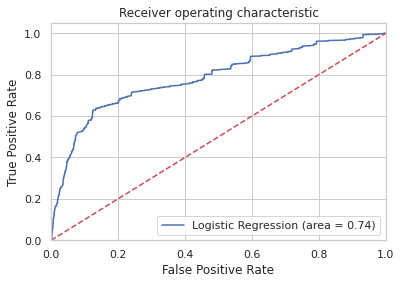

In [156]:
#ROC curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

The receiver operating characteristic (ROC) curve is another common tool used with binary classifiers. The dotted line represents the ROC curve of a purely random classifier; a good classifier stays as far away from that line as possible (toward the top-left corner).

**Conclusion:- Our model is having 74% accuracy for the bank dataset**

<h1><b>Experiment - 6 </b></h1>

<h2><b>Aim:- Naive Bayes Classifier using dataset </b></h2>

**Dataset:- sklearn wine data**

Loading Data<br>
Let's first load the required wine dataset from scikit-learn datasets.

In [157]:
#Import scikit-learn dataset library
from sklearn import datasets

#Load dataset
wine = datasets.load_wine()

**Exploring Data**<br>
we can print the target and feature names, to make sure we have the right dataset, as such:

In [159]:
# print the names of the 13 features
print("Features: ", wine.feature_names)

# print the label type of wine(class_0, class_1, class_2)
print( "Labels: ", wine.target_names)

Features:  ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
Labels:  ['class_0' 'class_1' 'class_2']


In [160]:
# print data(feature)shape
wine.data.shape

(178, 13)

In [162]:
# print the wine data features (top 5 records)
print(wine.data[0:5])

[[1.423e+01 1.710e+00 2.430e+00 1.560e+01 1.270e+02 2.800e+00 3.060e+00
  2.800e-01 2.290e+00 5.640e+00 1.040e+00 3.920e+00 1.065e+03]
 [1.320e+01 1.780e+00 2.140e+00 1.120e+01 1.000e+02 2.650e+00 2.760e+00
  2.600e-01 1.280e+00 4.380e+00 1.050e+00 3.400e+00 1.050e+03]
 [1.316e+01 2.360e+00 2.670e+00 1.860e+01 1.010e+02 2.800e+00 3.240e+00
  3.000e-01 2.810e+00 5.680e+00 1.030e+00 3.170e+00 1.185e+03]
 [1.437e+01 1.950e+00 2.500e+00 1.680e+01 1.130e+02 3.850e+00 3.490e+00
  2.400e-01 2.180e+00 7.800e+00 8.600e-01 3.450e+00 1.480e+03]
 [1.324e+01 2.590e+00 2.870e+00 2.100e+01 1.180e+02 2.800e+00 2.690e+00
  3.900e-01 1.820e+00 4.320e+00 1.040e+00 2.930e+00 7.350e+02]]


In [163]:
# print the wine labels (0:Class_0, 1:class_2, 2:class_2)
print(wine.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


**Splitting Data**

In [165]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=0.3,random_state=109) # 70% training and 30% test

**Model Generation**

In [166]:
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
gnb = GaussianNB()

#Train the model using the training sets
gnb.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = gnb.predict(X_test)

**Evaluating Model**<br>
After model generation, check the accuracy using actual and predicted values.

In [167]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9074074074074074


**Conclusion**<br>
Naive Bayes is the most straightforward and most potent algorithm. In spite of the significant advances of Machine Learning in the last couple of years, it has proved its worth. 
<br> 
**Accuracy of Our model for wine dataset is 90%**

<h1><b>Experiment - 7</b></h1>

<h2><b>Aim:- Decision Trees using datasets </b><h2>

**Dataset :- Iris dataset**

In [177]:
import numpy as np
# Import the needed matplotlib functionality for scatter plot visualization.
import matplotlib.pyplot as plt
# import the needed dataset.
from sklearn.datasets import load_iris
# Import the model and an additional visualization tool.
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [178]:
# Define a variable to establish three classes/species.
class_count = 3
# Define standard RGB color scheme for visualizing ternary classification in order to match the color map used later.
plot_colors = 'brg'
# Define marker options for plotting class assignments of training data.
markers = 'ovs'
# We also need to establish a resolution for plotting.  I favor clean powers of ten, but this is not by any means a hard and fast rule.
plot_res = 0.01

In [179]:
# Load the iris dataset from scikit-learn (note the use of from [library] import [function] above)
iris = load_iris()

(0.5, 7.390000000000006, -0.4, 2.9900000000000033)

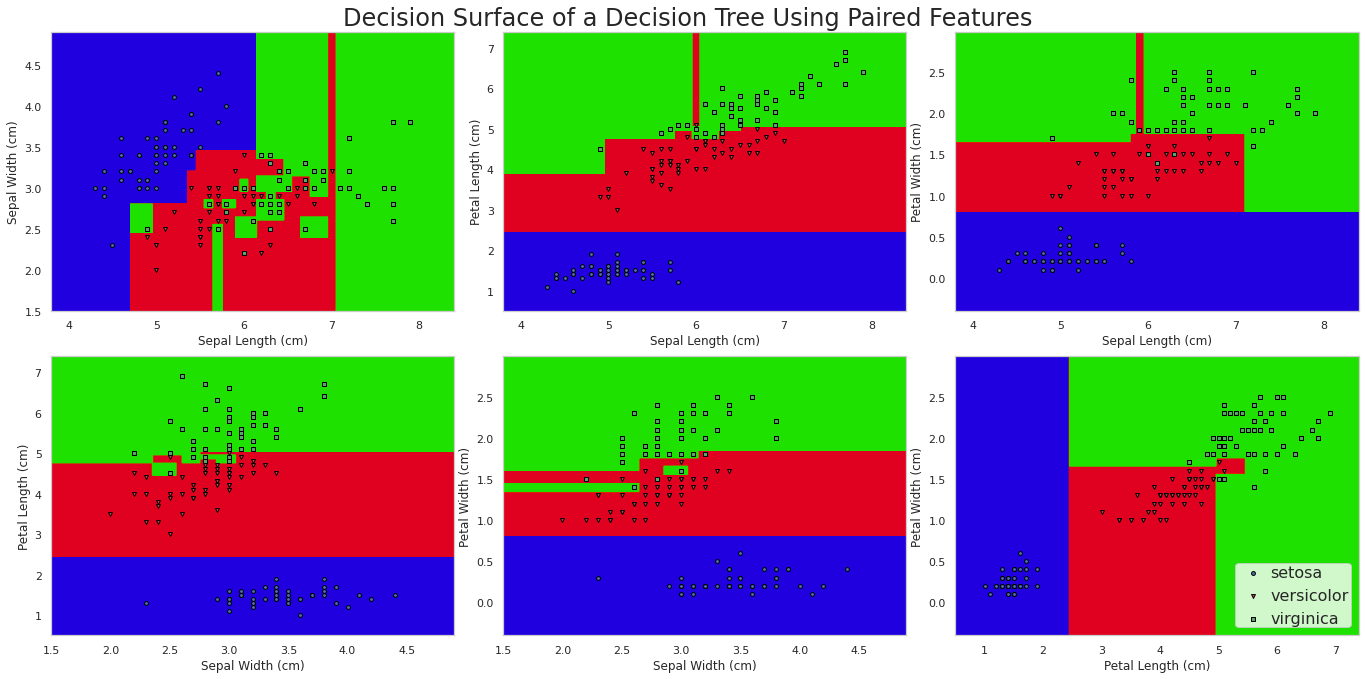

In [180]:
# Set the size of the figure used to contain the subplots to be generated.
plt.figure(figsize=(20,10))

# Create an empty list of models to store the results of each pairwise model fit.
models = []

# Use enumerate() to define the possible pairs of features available and iterate over each pair.
for pair_index, pair in enumerate([[0, 1], [0, 2], [0, 3], 
                                           [1, 2], [1, 3], 
                                                   [2, 3] ]):

    # We only take the two features corresponding to the pair in question...
    X, y = iris.data[:, pair] , iris.target
    
    # ... to fit the decision tree classifier model.
    model = DecisionTreeClassifier().fit(X, y)
    
    # Append the results to the models list
    models.append(model)
    
    # Establish a two row by three column subplot array for plotting.
    plt.subplot(2, 3, pair_index + 1)
    
    # Define appropriate x and y ranges for each plot...
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    # ... and use each range to define a meshgrid to use as the plotting area.
    xx, yy = np.meshgrid(np.arange(x_min, 
                                   x_max, 
                                   plot_res),
                         np.arange(y_min, 
                                   y_max, 
                                   plot_res) )
    # Use plt.tight_layout() to establish spacing of the subplots.
    plt.tight_layout(h_pad = 0.5, 
                     w_pad = 0.5, 
                       pad = 4.0 )
    
    # Predict the classification of each point in the meshgrid based on the calculated model above.
    # The numpy methods .c_() and .ravel() reshape our meshgrid values into a format compatible with our model.predict() method,
    Z = model.predict(np.c_[xx.ravel(), 
                            yy.ravel() ])
    # Reshape the predictions to match xx...
    Z = Z.reshape(xx.shape)
    # ... and prepare a contour plot that reflects the predictions .
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.brg)
    
    # Define the subplot axis labels after title casing while preserving case on the unit of measure 
    plt.xlabel(iris.feature_names[pair[0]].title()[0:-4] + iris.feature_names[pair[0]][-4:])
    plt.ylabel(iris.feature_names[pair[1]].title()[0:-4] + iris.feature_names[pair[1]][-4:])
    
    # Plot the training points for each species in turn
    for i, color, marker in zip(range(class_count), plot_colors, markers):
        # Subset the data to the class in question with the np.where() method
        index = np.where(y == i)
        # Plot the class in question on the subplot
        plt.scatter(X[index, 0], 
                    X[index, 1], 
                    c = color,
                    marker = marker,
                    label = iris.target_names[i],
                    cmap = plt.cm.brg, 
                    edgecolor = 'black', 
                    s = 15                       )

# Define a title for the overall collection of subplots after each subplot is fully defined
plt.suptitle('Decision Surface of a Decision Tree Using Paired Features',
             size = 24                                                   )

# Define the legend for the subplot collection
plt.legend(loc = 'lower right',
           fontsize = 16,
           borderpad = 0.1, 
           handletextpad = 0.1 )

# Set limits just large enough to show everything cleanly
plt.axis("tight")

In the above plots, there are occasionally generated small islands or peninsulae of classification which show us the Achilles' heel of Decision tree models: their tendency to overfit the data. While these small cutouts improve the accuracy of the model on the training data, they also result in a model that applies increasingly implausible critera to the data which likely won't stand up when new data is used to test the model.

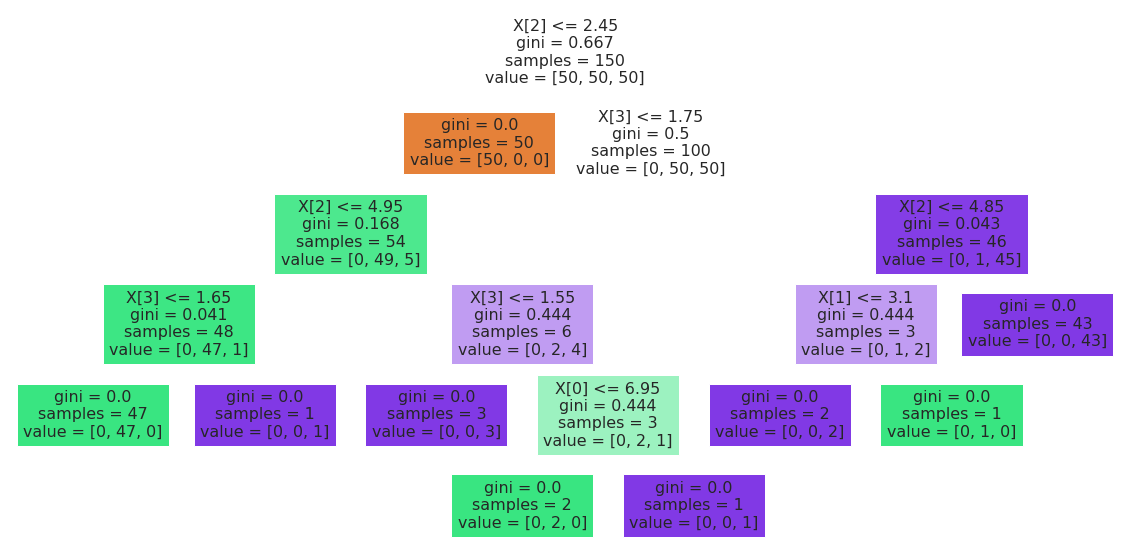

In [181]:
# Apply the decision tree classifier model to the data using all four parameters at once.
model_all_params = DecisionTreeClassifier().fit(iris.data, iris.target)
# Prepare a plot figure with set size.
plt.figure(figsize = (20,10))
# Plot the decision tree, showing the decisive values and the improvements in Gini impurity along the way.
plot_tree(model_all_params, 
          filled=True      )
# Display the tree plot figure.
plt.show()

We may very simply add the max_depth parameter to the model with a value of 3 and observe the effect of forcing some simplicity on the tree, akin to pruning all the smallest branches of a tree down to a few points of divergence closest to the trunk.

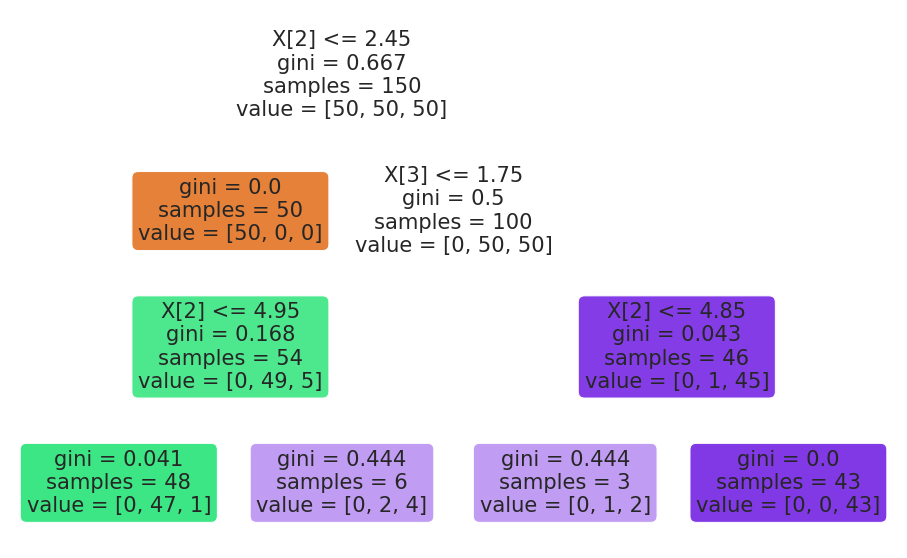

In [182]:
# Apply the decision tree classifier model to the data using all four parameters at once, but with a maximum tree depth of 3
model_all_params_max_depth_3 = DecisionTreeClassifier(max_depth = 3).fit(iris.data, iris.target)
# Prepare a plot figure with set size.
plt.figure(figsize = (16,10))
# Plot the decision tree.
plot_tree(model_all_params_max_depth_3,
          rounded = True,
          filled = True                )
# Display the tree plot figure.
plt.show()

This leaves (no pun intended) us with only four misclassified points by applying a total of four tests, and trimming one level sooner, i.e., setting max_depth to 2, would only have six errors out of the 150 points.

Another approach we might consider is to mandate that there must be a significant increase in impurity for the split to occur. Setting the min_impurity_decrease parameter will allow us to restrict splits to those that significantly improve the results of the overal model behavior.

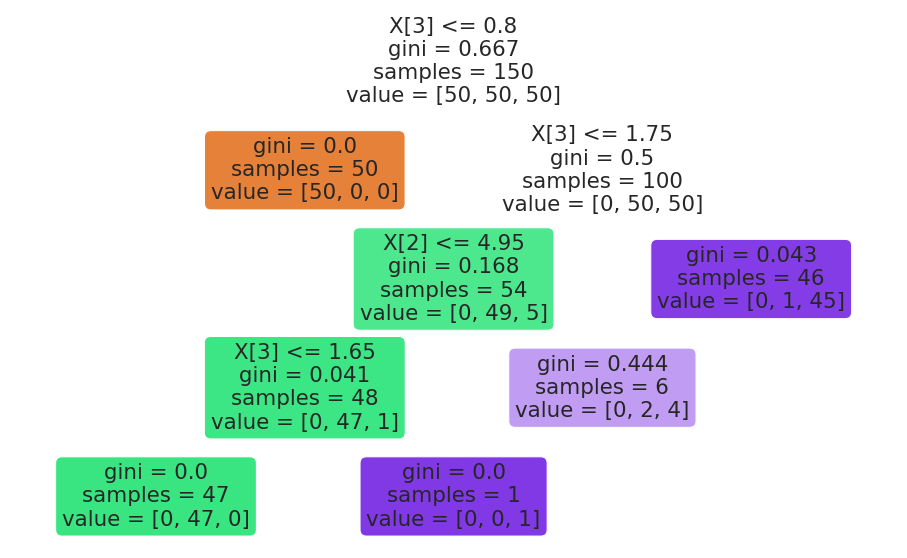

In [183]:
# Apply the model to the data as before, but with a minimum impurity decrease of 0.01
model_all_params_min_imp_dec_001 = DecisionTreeClassifier(min_impurity_decrease = 0.01).fit(iris.data, iris.target)
# Prepare a plot figure with set size.
plt.figure(figsize = (16,10))
# Plot the decision tree.
plot_tree(model_all_params_min_imp_dec_001,
          rounded = True,
          filled = True                )
# Display the tree plot figure.
plt.show()

This approach gets us to three misclassified points out of 150 with the same number of tests as before with max_depth = 3, but we are now able to apply the questions a bit more efficiently.

Having made this improvement using the full dataset, let's now circle back to that last subplot which also used only petal length and petal width and see how it shows in plot_tree().

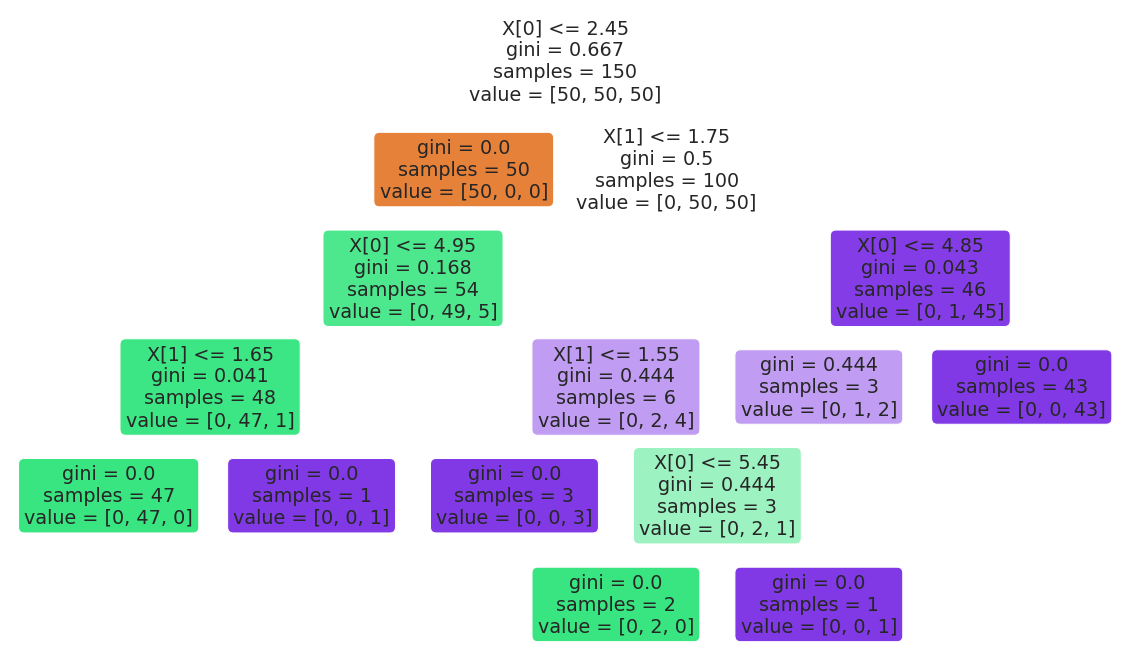

In [184]:
# Prepare a plot figure with set size.
plt.figure(figsize = (20,12))
# Plot the decision tree, showing the decisive values and the improvements in Gini impurity along the way.
plot_tree(models[5],
          rounded = True,
          filled = True  )
# Display the tree plot figure.
plt.show()

**Conclusion:- Seven conditionals to yield only one misclassified sample out of 150 using only the two most important features out of the four available.**

<h1><b>Experiment - 8 </b></h1>

<h2><b>Aim:- Simulate Principal Component Ananlysis </b></h2>

**Datasets- iris Data**

In [185]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [196]:
import pandas as pd
url = "/content/iris.data"
# load dataset into Pandas DataFrame
df = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','target'])


**Standardize the Data**<br>
PCA is effected by scale so you need to scale the features in your data before applying PCA. Use StandardScaler to help you standardize the dataset’s features onto unit scale (mean = 0 and variance = 1) which is a requirement for the optimal performance of many machine learning algorithms.

In [197]:
from sklearn.preprocessing import StandardScaler
features = ['sepal length', 'sepal width', 'petal length', 'petal width']
# Separating out the features
x = df.loc[:, features].values
# Separating out the target
y = df.loc[:,['target']].values
# Standardizing the features
x = StandardScaler().fit_transform(x)

**PCA Projection to 2D**<br>
The original data has 4 columns (sepal length, sepal width, petal length, and petal width). In this section, the code projects the original data which is 4 dimensional into 2 dimensions. I should note that after dimensionality reduction, there usually isn’t a particular meaning assigned to each principal component. The new components are just the two main dimensions of variation.

In [198]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [191]:
# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(float)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap=plt.cm.nipy_spectral,
           edgecolor='k')

In [199]:
finalDf = pd.concat([principalDf, df[['target']]], axis = 1)


Concatenating DataFrame along axis = 1. finalDf is the final DataFrame before plotting the data.

**Visualize 2D Projection**

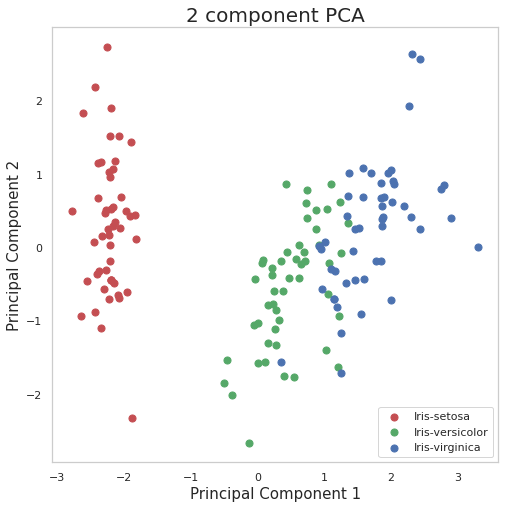

In [200]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [201]:
#Explained Variance
#The explained variance tells you how much information (variance) can be attributed to each of the principal components
pca.explained_variance_ratio_

array([0.72770452, 0.23030523])

**conclusion**<br>
the first principal component contains 72.77% of the variance and the second principal component contains 23.03% of the variance. Together, the two components contain 95.80% of the information.